# Prediction using Supervised ML

Here,we are doing simple linear regression with 2 variables to find out the percentage of student based on the no.of study Hours

Linear Regression Is used  For finding Out Relationship Between Target & Predictor.
We are using Simple Linear Regression here Because we are finding out the relationship between the two continuous Variables(Dependent & Independent).so Here ,if we give number of hours studied by a student as an input, our model should predict their mark with minimum error.

#### Step 1: Importing data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [3]:
# Importing all datasets
Student_data = pd.read_csv("Student.csv")
Student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Step 2 :Inspecting the DataFrame

In [4]:
# Let's see the dimension of our master dataset
Student_data.shape

(25, 2)

In [5]:
# let's look at the statistical aspects of the dataframe
Student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
# Let's Check For the Null Values
Student_data.isnull == True

False

In [7]:
# Let's check for Duplicate Values
Student_data.duplicated().sum()

0

In [8]:
# Let's see the type of each column
Student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Step 2:  Data Visualization

Let's now spend some time doing what is arguably the most important step - understanding the data.

1:If there is some obvious multicollinearity going on, this is the first place to catch it


2:here's where you'll also identify if some predictors directly have a strong association with the outcome variable\

We'll visualise our data using matplotlib and seaborn.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

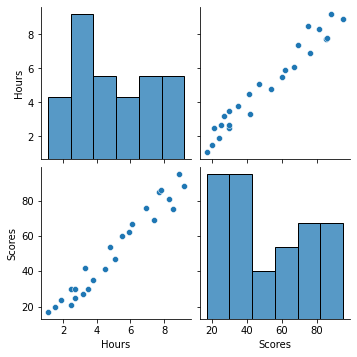

In [10]:
sns.pairplot(Student_data)
plt.show()

##### Inferences:
    
The No.Of Hours Student Studies is directly Proportional to his scores.So there's Correlationin between the no.of hours and scores. from the above graph.

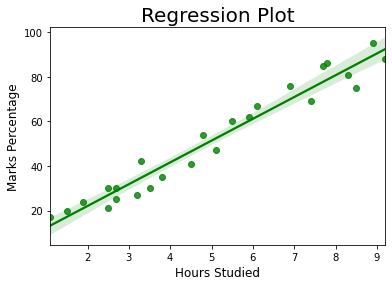

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [11]:
sns.regplot(x= Student_data['Hours'], y= Student_data['Scores'], color = 'Green')
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(Student_data.corr())

##### Inference:

From the Graph We can see that Hour and Marks are Having Positive correlation.

#### Step 3:

Test- Train Split Using Sklearn

#### Preparing the data

The attributes are stored in the x-variable.We specified '-1' as range for columns since we wanted our attribute set to contain
all the columns except the last one which is 'scores' .Similarly the y-variables contains the labels.we specified 1 for 
the label column since the index for 'score' column is 1. remember the column indexes start with 0,with 1 being the 
second column

In [12]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [13]:
# Defining X and y from the Data
X = Student_data.iloc[:, :-1].values  
y = Student_data.iloc[:, 1].values

#### Splitting the data

Now that we have our attributes & labels,The next step is to split this data into taining & test dataset by using scikit learn

In [14]:
# Spliting the Data in two
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

##### Inferences
The above script splits 80% data to training set & 20% data to test set.The test_size variable is where we actually specify
the proportion of the test set

In [15]:
len (train_X)

18

In [16]:
len (test_X)

7

#### Training The Model

In [17]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("---------Model Trained---------")

---------Model Trained---------


In [19]:
regression.coef_

array([9.94167834])

In [20]:
regression.intercept_

1.9322042531516601

#### Visualizing The Model

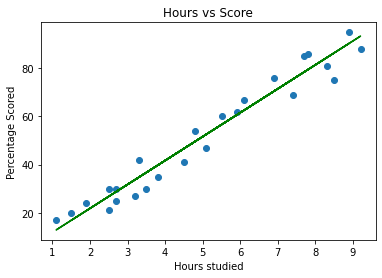

In [22]:
line = regression.coef_*X + regression.intercept_ # Plotting the regression Line

#Plotting the Test Data
plt.scatter(X,y)
plt.title("Hours vs Score")
plt.xlabel("Hours studied")
plt.ylabel("Percentage Scored")
plt.plot(X,line,color='green')
plt.show()


#### Percentage of marks Prediction


In [23]:
pred_y = regression.predict(test_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in test_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


#### Comparing the Predicted & Actual Marks

In [24]:
compare_scores = pd.DataFrame({'Actual Marks': test_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


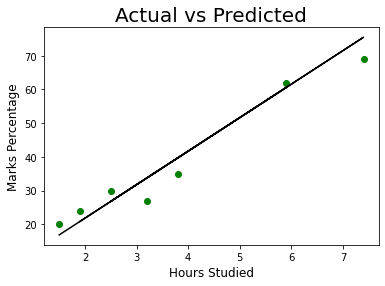

In [25]:
plt.scatter(x=test_X, y=test_y, color='green')
plt.plot(test_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

#### Model Evaluation

In [26]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(test_y,pred_y))

Mean absolute error:  4.130879918502482


#### Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.

### What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [27]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))



Score = 93.893


#### According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.893 marks.

### Created By Lumbini S.